## A Simple Analysis of Apple HR employee with respect to time
Apple is one of the biggest company in the world and this is not coming down any time soon. There are several factors that may have caused this and i will be looking into on of these factors from their employee perspective.

I got data of:
1. employees count from 1995 to 2023
2. revenue and net income from 2009 to 2023
3. diversity data in employees from 2014 to 2022
4. diversity data in leaders from 2014 to data
5. diversity data in sex for both leaders and employees from 2014 to 2022

There are several ways to check the success or profit of a company. Here i will be using the net income even though it is not the best as it can be affected by inflation and other factors as we know $1 20 years ago is not the same thing as $1 today, The purchasing power is different. 

For the purpose of simple analysis, I will keep all factor constant(ceteris paribus).
What i want to acheive in this analysis is to know how the change in employee statistics affect the net income

The data gotten is in reverse as it should be from 2022 - X, so i have to reversed this before i work on it for a proper result

In [103]:
# importing my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing my data
reversed_employee_data = pd.read_csv('employee_data_apple.csv') # employees count from 1995 to 2023
reversed_data_race_diverse = pd.read_csv('employee_diversify_apple.csv') # diversity data in employees from 2014 to 2022
reversed_data_gender_diverse = pd.read_csv('employee_diversity_apple_sex.csv') # diversity data in sex for employee
reversed_leaders_race_diverse = pd.read_csv('leaders_diversity_apple.csv') # diversity data in leaders race 2014 to 2022
reversed_leaders_gender_diverse = pd.read_csv('leaders_diversity_apple_sex.csv') # diversity data in leaders  sex from 2014 to 2022
reversed_revenue_net_income = pd.read_csv('revenue_and_net_income_apple.csv') # revenue and net income from 2009 to 2023

# reversing the data for proper analysis
employee_data = reversed_employee_data.iloc[::-1].reset_index(drop=True)
data_race_diverse = reversed_data_race_diverse.iloc[::-1].reset_index(drop=True)
data_gender_diverse = reversed_data_gender_diverse.iloc[::-1].reset_index(drop=True)
leaders_race_diverse = reversed_leaders_race_diverse.iloc[::-1].reset_index(drop=True)
leaders_gender_diverse = reversed_leaders_gender_diverse.iloc[::-1].reset_index(drop=True)
revenue_net_income = reversed_revenue_net_income.iloc[::-1].reset_index(drop=True)


In [104]:
# Droping the row of the data from 1995 to 2013 because it will not be useful for our analysis
employee_data = employee_data.drop(employee_data.index[:14])
data_race_diverse['Asian'].dtype
print(data_race_diverse['Asian'].dtype)
data_race_diverse.head()

object


,overall,Asian,Black,Hispanic/Latinx,Indigenous,Multiracial,White
0,2014,15%,7%,11%,1%,2%,55%
1,2015,18%,8%,11%,1%,2%,54%
2,2016,19%,9%,12%,1%,2%,56%
3,2017,21%,9%,13%,1%,3%,54%
4,2018,23%,9%,14%,1%,3%,50%


In [105]:
# converting all the value to integers and removing the symbols for better analysis and plotting
revenue_net_income['net_income'] = revenue_net_income['net_income'].str.replace(',', '').astype(int)

# removing % in all the diverse data
columns_to_clean_gender = ['male', 'female']
columns_to_clean = ['Asian', 'Black', 'Indigenous', 'White', 'Hispanic/Latinx', 'Multiracial'] 
columns_to_clean_leaders = ['Asian', 'Black', 'Indigenous', 'White', 'Hispanic/Latinx', 'Mutliracial']
data_race_diverse[columns_to_clean] = data_race_diverse[columns_to_clean].replace('%', '', regex=True).astype(float)
leaders_race_diverse[columns_to_clean_leaders] = leaders_race_diverse[columns_to_clean_leaders].replace('%', '', regex=True).astype(float)
data_gender_diverse[columns_to_clean_gender] = data_gender_diverse[columns_to_clean_gender].replace('%', '', regex=True).astype(float)
leaders_gender_diverse[columns_to_clean_gender] = leaders_gender_diverse[columns_to_clean_gender].replace('%', '', regex=True).astype(float)
data_race_diverse.head()

,overall,Asian,Black,Hispanic/Latinx,Indigenous,Multiracial,White
0,2014,15.0,7.0,11.0,1.0,2.0,55.0
1,2015,18.0,8.0,11.0,1.0,2.0,54.0
2,2016,19.0,9.0,12.0,1.0,2.0,56.0
3,2017,21.0,9.0,13.0,1.0,3.0,54.0
4,2018,23.0,9.0,14.0,1.0,3.0,50.0


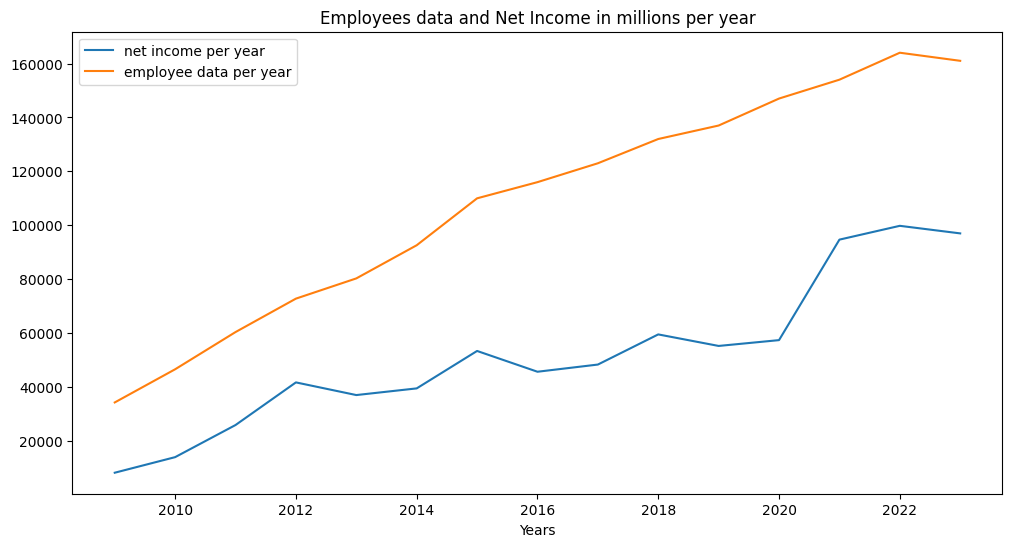

In [106]:
# viewing the net income per year
years = employee_data['Date']
employees = employee_data['Employees']
years_r = revenue_net_income['year']
net_income = revenue_net_income['net_income']

# plotting my data
plt.figure(figsize=(12,6))
plt.plot(years_r, net_income, label = "net income per year")
plt.plot(years, employees, label = "employee data per year")
plt.xlabel('Years')
plt.title('Employees data and Net Income in millions per year')
plt.legend()
plt.show()

As we can see that there is a steady growing wavy graph in Net Income until 2020-2021 as the labour force increase. so it means that even though there is increase in revenue over the year there is no much increase in profit. But during 2021 research claims thw demands for 5G iPhone 12 brought about the profit made

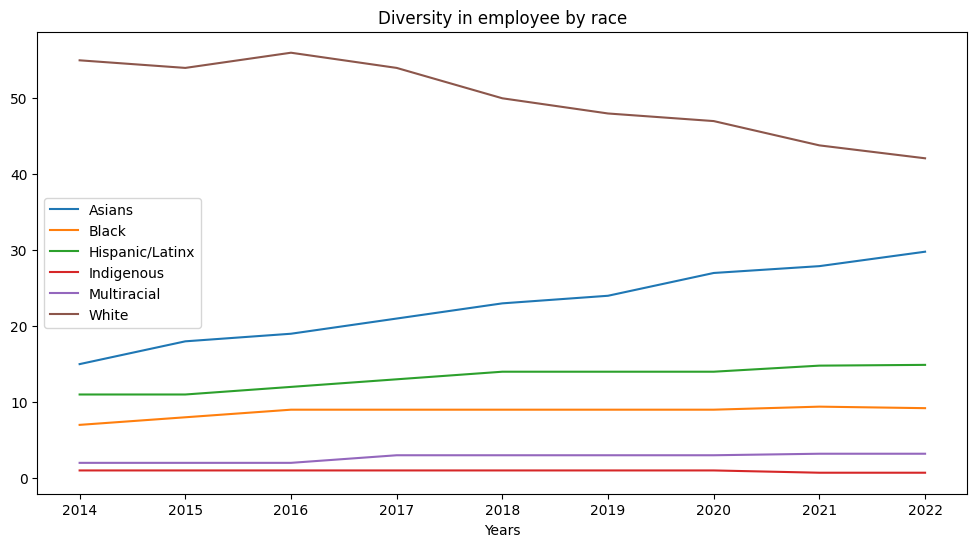

In [108]:
# checking the diversity in the race of the employee
years = data_race_diverse['overall']
asian = data_race_diverse['Asian']
black = data_race_diverse['Black']
hispanic = data_race_diverse['Hispanic/Latinx']
indigenous = data_race_diverse['Indigenous']
multiracial = data_race_diverse['Multiracial']
white = data_race_diverse['White']
# plotting my data
plt.figure(figsize=(12,6))
plt.plot(years, asian, label = "Asians")
plt.plot(years, black, label = "Black")
plt.plot(years, hispanic, label = "Hispanic/Latinx")
plt.plot(years, indigenous, label = "Indigenous")
plt.plot(years, multiracial, label = "Multiracial")
plt.plot(years, white, label = "White")
plt.xlabel('Years')
plt.title('Diversity in employee by race')
plt.legend()
plt.show()

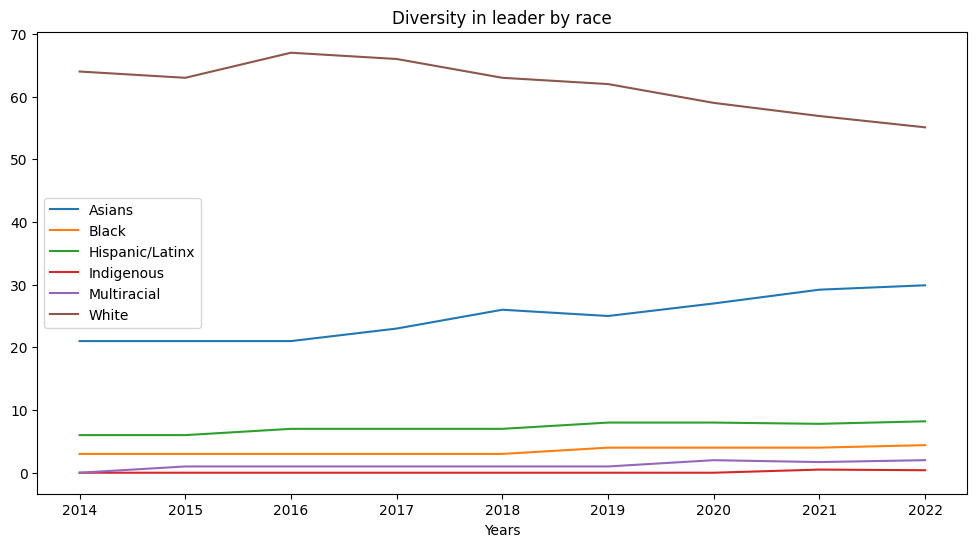

In [113]:
# checking the diversity in the race of the employee
years = leaders_race_diverse['year']
asian = leaders_race_diverse['Asian']
black = leaders_race_diverse['Black']
hispanic = leaders_race_diverse['Hispanic/Latinx']
indigenous = leaders_race_diverse['Indigenous']
multiracial = leaders_race_diverse['Mutliracial']
white = leaders_race_diverse['White']
# plotting my data
plt.figure(figsize=(12,6))
plt.plot(years, asian, label = "Asians")
plt.plot(years, black, label = "Black")
plt.plot(years, hispanic, label = "Hispanic/Latinx")
plt.plot(years, indigenous, label = "Indigenous")
plt.plot(years, multiracial, label = "Multiracial")
plt.plot(years, white, label = "White")
plt.xlabel('Years')
plt.title('Diversity in leader by race')
plt.legend()
plt.show()

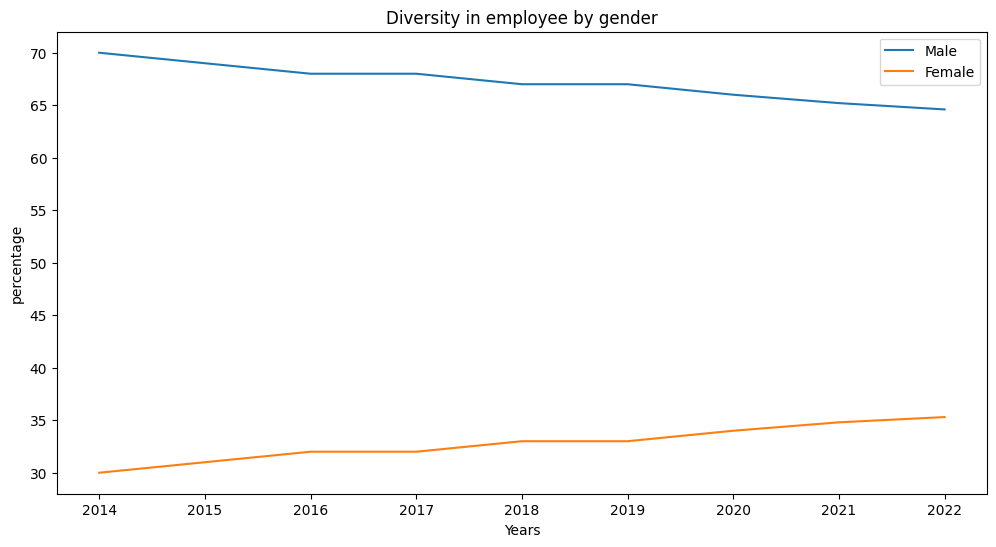

In [112]:
# checking the diversity in the gender of the employee
years = data_gender_diverse['year']
male = data_gender_diverse['male']
female = data_gender_diverse['female']

# plotting my data
plt.figure(figsize=(12,6))
plt.plot(years, male, label = "Male")
plt.plot(years, female, label = "Female")
plt.xlabel('Years')
plt.ylabel('percentage')
plt.title('Diversity in employee by gender')
plt.legend()
plt.show()

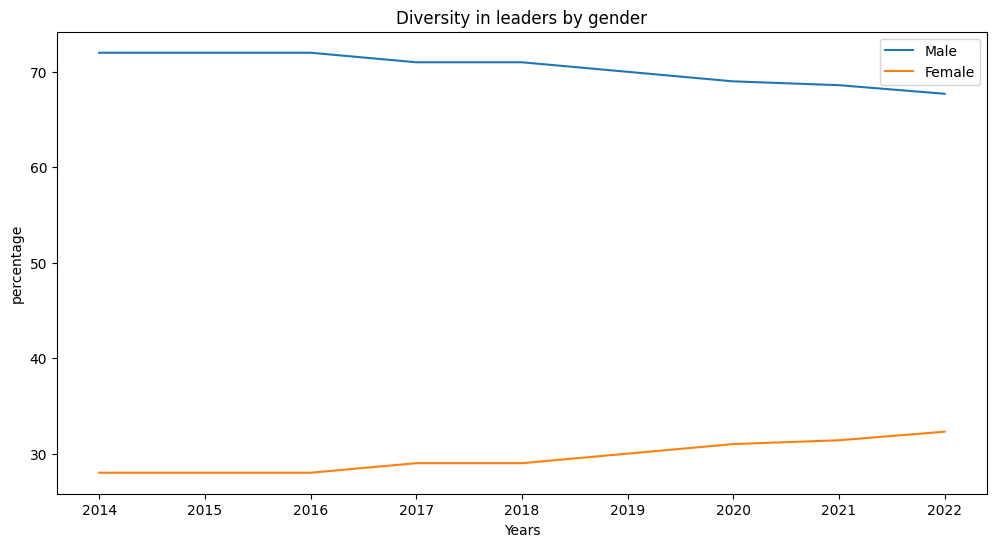

In [111]:
# checking the diversity in the gender of the employee
years = leaders_gender_diverse['year']
male = leaders_gender_diverse['male']
female = leaders_gender_diverse['female']

# plotting my data
plt.figure(figsize=(12,6))
plt.plot(years, male, label = "Male")
plt.plot(years, female, label = "Female")
plt.xlabel('Years')
plt.ylabel('percentage')
plt.title('Diversity in leaders by gender')
plt.legend()
plt.show()

### Conclusion
From this few analyses i have done, we can deduce that increasing the number of employees does not directly means increase in profit although the revenue is increasing. Also increasing gender diversity is not a major factor of increase profit. However looking well at the graph we can say there have not much increase in diversity of race for the employees and leaders. Therefore if Apple embrace more diversity of race in their employee it might bring about major change in the profit and growth of the organization  